### MACHINE LEARNING PROJECT

This is a Machine Learning Project about Loan Data from a Bank Company. For this project we will be exploring publicly available data from LendingClub.com. Lending Club connects people who need money (borrowers) with people who have money (investors). Hopefully, as an investor you would want to invest in people who showed a profile of having a high probability of paying you back. We will try to create a model that will help predict this.

We will use lending data from 2007-2010 and be trying to classify and predict whether or not the borrower paid back their loan in full. You can download the data from here or just use the csv already provided.

Melisa Damayanti
January 2023
Source : Udemy Course

COLUMN DESCRIPTIONS
1. credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
2. purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
3. int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
4. installment: The monthly installments owed by the borrower if the loan is funded.
5. log.annual.inc: The natural log of the self-reported annual income of the borrower.
6. dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
7. fico: The FICO credit score of the borrower.
8. days.with.cr.line: The number of days the borrower has had a credit line.
9. revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
10. revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
11. inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
12. delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
13. pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).
14. not_fully_paid

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%time

CPU times: total: 0 ns
Wall time: 0 ns


In [96]:
df = pd.read_csv('loan_data.csv')

In [97]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [99]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [100]:
df.duplicated().sum()

0

In [101]:
categoricals = ['purpose']
numericals = ['credit.policy','int.rate','installment','log.annual.inc','dti','fico','days.with.cr.line','revol.bal','revol.util','inq.last.6mths','delinq.2yrs','pub.rec','not.fully.paid']
for col in categoricals:
  print(f"Value counts of {col} column")
  print(df[col].value_counts(), '\n')

Value counts of purpose column
debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: purpose, dtype: int64 



#### Exploratory Data Analysis of Loan Data

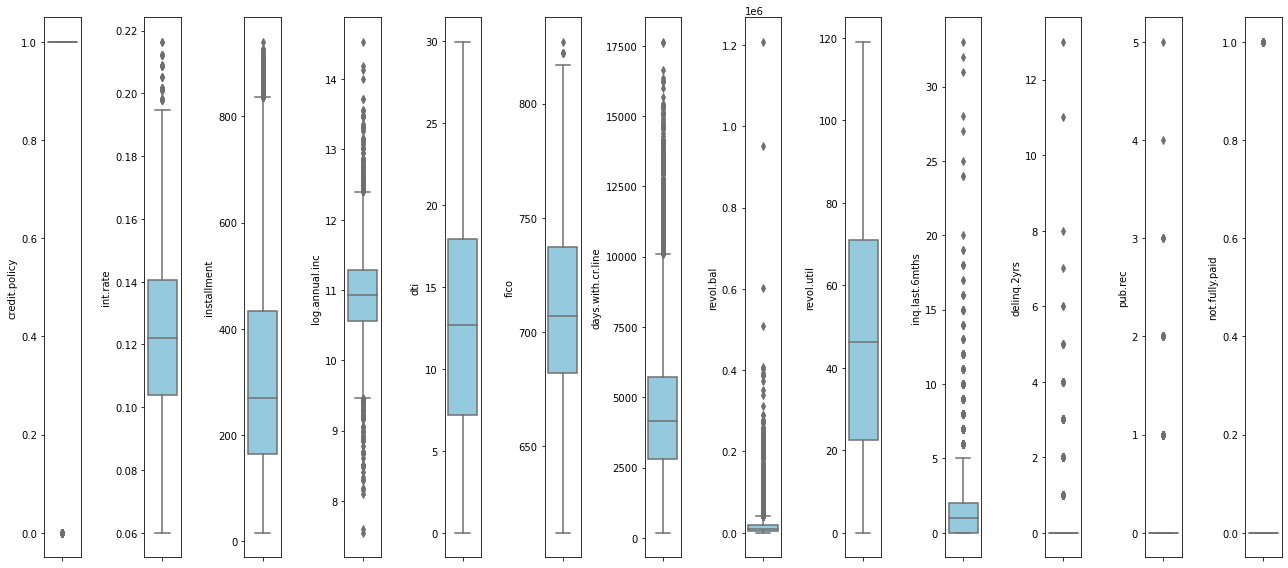

In [102]:
plt.figure(figsize=(18,8))

features = numericals
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]], color='skyblue')
    plt.tight_layout()

C:\Users\Melisa Damayanti\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Melisa Damayanti\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Melisa Damayanti\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexib

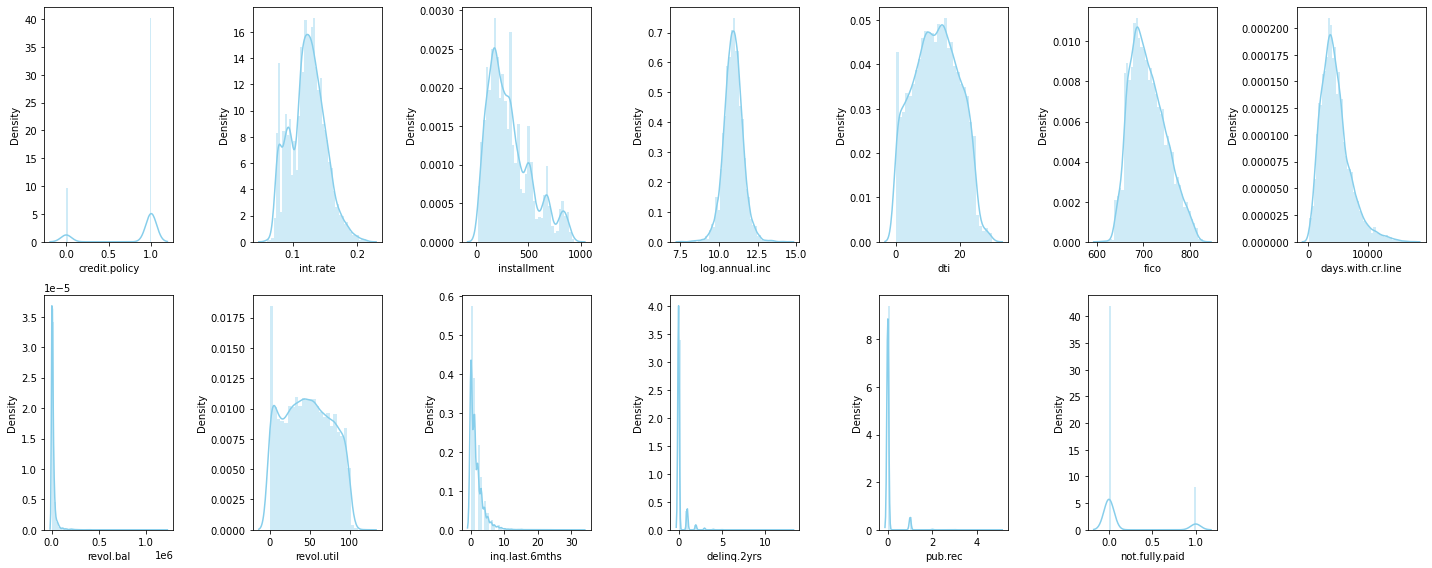

In [103]:
plt.figure(figsize=(20,8))

features = numericals
for i in range(0, len(features)):
    plt.subplot(2, len(features)//2 + 1, i+1)
    #plt.subplot(1, len(features), i+1)
    sns.distplot(x=df[features[i]], color='skyblue')
    plt.xlabel(features[i])
    plt.tight_layout()

<AxesSubplot:>

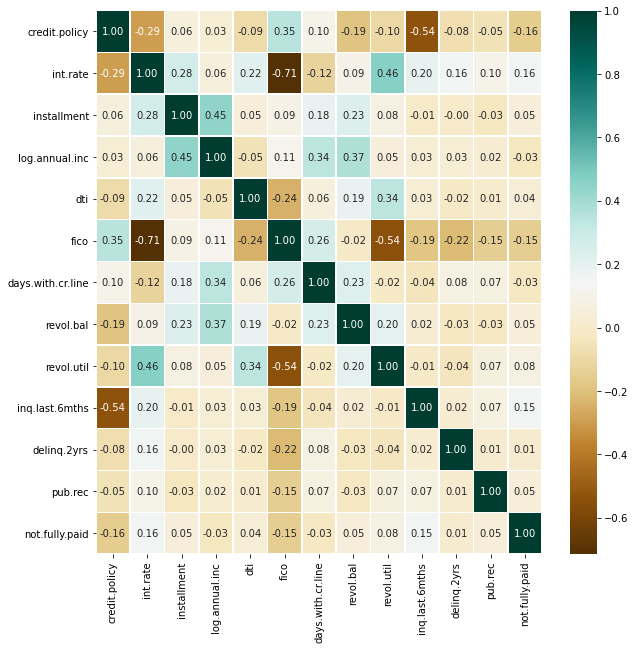

In [104]:
# correlation heatmap
fig, ax = plt.subplots(figsize=(10,10))
correlation = df.corr()
sns.heatmap(correlation, annot=True, fmt='.2f', ax=ax, linewidths=.5, cmap ='BrBG')

Text(0.5, 0, 'FICO')

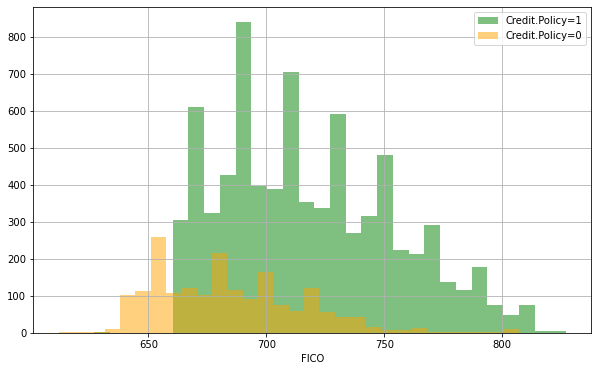

In [105]:
plt.figure(figsize=(10,6))
df[df['credit.policy']==1]['fico'].hist(alpha=0.5,color='green',
                                              bins=30,label='Credit.Policy=1')
df[df['credit.policy']==0]['fico'].hist(alpha=0.5,color='orange',
                                              bins=30,label='Credit.Policy=0')
plt.legend()
plt.xlabel('FICO')

As we know from investopedia.com:
The overall FICO score range is between 300 and 850. In general, scores in the 670 to 739 range indicate a “good” credit history and most lenders will consider this score favorable. In contrast, borrowers in the 580 to 669 range may find it difficult to obtain financing at attractive rates.
Most of borrowers in LendingClub.com with Fico Score between 670-800 has 1 credit policy. However, it is possible that a borrower with a good FICO score range will get a 0 credit policy.

Text(0.5, 0, 'FICO')

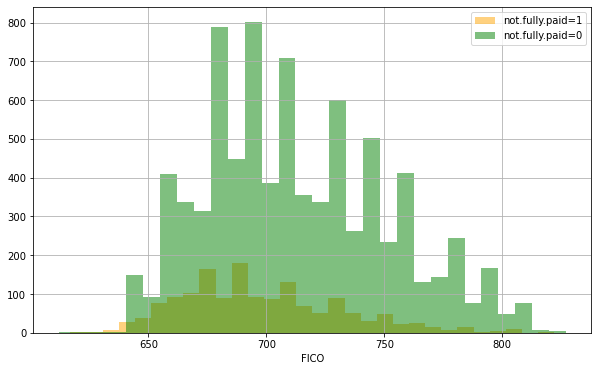

In [106]:
plt.figure(figsize=(10,6))
df[df['not.fully.paid']==1]['fico'].hist(alpha=0.5,color='orange',
                                              bins=30,label='not.fully.paid=1')
df[df['not.fully.paid']==0]['fico'].hist(alpha=0.5,color='green',
                                              bins=30,label='not.fully.paid=0')
plt.legend()
plt.xlabel('FICO')

The histogram shows that borrowers who have a good FICO score range mostly fully paid their loan. 

<AxesSubplot:xlabel='purpose', ylabel='count'>

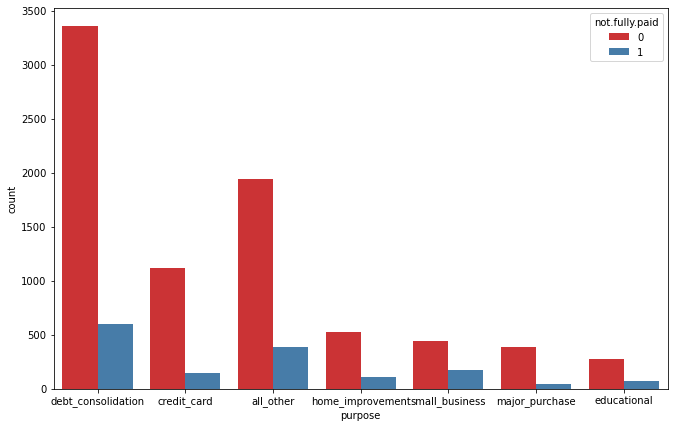

In [107]:
plt.figure(figsize=(11,7))
sns.countplot(x='purpose',hue='not.fully.paid',data=df,palette='Set1')

Most of borrowers are have a purpose in debt_consolidation. 

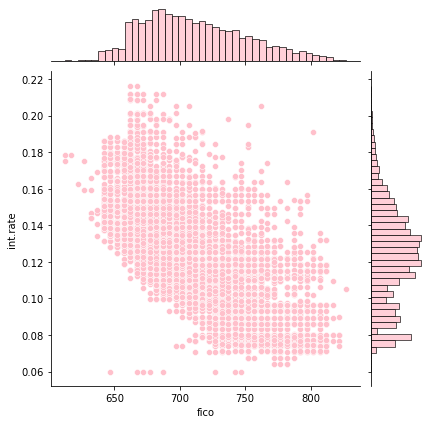

In [108]:
sns.jointplot(x='fico',y='int.rate',data=df,color='pink')

According to the LendingClub policy borrowers with low fico score (to be more risky) mostly has a higher int_rate.

<Figure size 792x504 with 0 Axes>

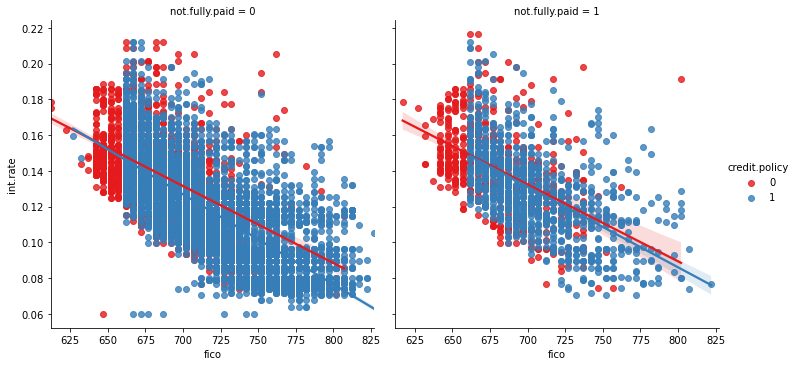

In [109]:
plt.figure(figsize=(11,7))
sns.lmplot(y='int.rate',x='fico',data=df,hue='credit.policy',
           col='not.fully.paid',palette='Set1')

#### Feature Engineering

In [110]:
loans = pd.get_dummies(df,columns=categoricals,drop_first=True)
loans

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1,0,0,0,0,0,0
9574,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1,0,0,0,0,0,0
9575,0,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1,0,1,0,0,0,0
9576,0,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1,0,0,0,1,0,0


In [111]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  not.fully.paid              9578 non-null   int64  
 13  purpose_credit_card         9578 

In [115]:
#import pandas
#from sklearn import linear_model
#from sklearn.preprocessing import StandardScaler
#scale = StandardScaler()
#dfn = scale.fit_transform(loans)
#scaled_features_df = pd.DataFrame(dfn, index=loans.index, columns=loans.columns)
#scaled_features_df

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,0.492222,-0.139318,2.463099,0.680388,0.998505,0.688825,0.432230,0.353732,0.182704,-0.716989,-0.299730,-0.237003,-0.436524,-0.389558,1.191856,-0.192721,-0.265117,-0.218647,-0.262855
1,0.492222,-0.578868,-0.438854,0.244031,0.244540,-0.101303,-0.721230,0.495018,1.030602,-0.716989,-0.299730,-0.237003,-0.436524,2.567010,-0.839028,-0.192721,-0.265117,-0.218647,-0.262855
2,0.492222,0.486484,0.230708,-0.908659,-0.141885,-0.759742,0.059770,-0.397073,-0.730683,-0.262470,-0.299730,-0.237003,-0.436524,-0.389558,1.191856,-0.192721,-0.265117,-0.218647,-0.262855
3,0.492222,-0.813544,-0.757022,0.680388,-0.654697,0.030385,-0.745277,0.496321,0.909966,-0.262470,-0.299730,-0.237003,-0.436524,-0.389558,1.191856,-0.192721,-0.265117,-0.218647,-0.262855
4,0.492222,0.743509,-1.043992,0.597961,0.343326,-1.154806,-0.198161,-0.360663,-0.251586,-0.716989,1.531147,-0.237003,-0.436524,2.567010,-0.839028,-0.192721,-0.265117,-0.218647,-0.262855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,-2.031603,0.873884,0.123976,2.031030,-0.322023,-1.023118,2.368325,5.879467,1.216726,0.192048,-0.299730,-0.237003,2.290825,-0.389558,-0.839028,-0.192721,-0.265117,-0.218647,-0.262855
9574,-2.031603,0.099083,-0.296481,0.341170,-1.800898,0.293761,-0.072400,-0.495638,-1.575135,1.555604,-0.299730,-0.237003,2.290825,-0.389558,-0.839028,-0.192721,-0.265117,-0.218647,-0.262855
9575,-2.031603,-0.578868,-1.068670,-0.545694,0.070213,-0.628054,-0.444860,-0.203765,1.244300,2.919159,-0.299730,-0.237003,2.290825,-0.389558,1.191856,-0.192721,-0.265117,-0.218647,-0.262855
9576,-2.031603,1.391660,0.156914,-0.182730,0.954924,-0.496366,-1.105722,-0.501089,-1.502753,1.555604,-0.299730,-0.237003,2.290825,-0.389558,-0.839028,-0.192721,3.771915,-0.218647,-0.262855


In [ ]:
All columns are already numericals, ready to modelling.

In [116]:
df['not.fully.paid'].value_counts()

0    8045
1    1533
Name: not.fully.paid, dtype: int64

#### Dataset Splitting

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
df_train, df_test = train_test_split(loans, 
                                     test_size = 0.25, random_state = 1) 

In [76]:
x_train_data = df_train.loc[:, df_train.columns!='not.fully.paid']
y_train_data = df_train.loc[:, df_train.columns=='not.fully.paid']

x_test_data = df_test.loc[:, df_test.columns!='not.fully.paid']
y_test_data = df_test.loc[:, df_test.columns=='not.fully.paid']

In [77]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [85]:
def evaluate(model, x_test = x_test_data, y_test = y_test_data):
    y_pred = model.predict(x_test)    
    print('Accuracy:', accuracy_score(y_test, y_pred))
    print('------')
    print('Confusion Matrix:')
    print()
    print(classification_report(y_test, y_pred))
    print('------')
    
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    print('Assuming 0 as positive, we get:')
    print('')
    print('True Positive:', tn)
    print('True Negative:', tp)
    print('False Positive:', fn)
    print('False Negative:', fp)
    
    print('')
    
    precision = tn/(tn+fn)
    recall = tn/(tn+fp)
    
    print('Precision:', precision)
    print('Recall:', recall)
    print('F1-Score:', 2 * (precision * recall)/(precision + recall))

In [86]:
base_model = RandomForestClassifier(random_state = 1, n_jobs = -1)
base_model.fit(x_train_data, y_train_data)
evaluate(base_model)

<ipython-input-86-675ee08c1d84>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  base_model.fit(x_train_data, y_train_data)


Accuracy: 0.8334029227557411
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1992
           1       0.61      0.03      0.05       403

    accuracy                           0.83      2395
   macro avg       0.72      0.51      0.48      2395
weighted avg       0.80      0.83      0.76      2395

------
Assuming 0 as positive, we get:

True Positive: 1985
True Negative: 11
False Positive: 392
False Negative: 7

Precision: 0.8350862431636517
Recall: 0.9964859437751004
F1-Score: 0.9086747539482719


From this model prediction we have 83% accuracy, and the model can 84% precisely predict borrowers who fully paid and with 100% recall. 

This model might be need adjustment, and feel free to give suggestion for a better metrics evaluation.